In [46]:
# import library
from neuralNetwork import NeuralNetWork
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
# declare some variable

img_size = 28
num_hidden_nodes = 200
learning_rate = 0.1

In [48]:
# processing data
#train dataset 100
# get data from file


data_file = open('mnist_train_100.csv','r')
rough_data = data_file.readlines()
data_file.close()

for i in range(len(rough_data)):
    rough_data[i] = rough_data[i].split(',')

#print(len(rough_data))

data_file = open('mnist_test_10.csv', 'r')
rough_test = data_file.readlines()
data_file.close()


for i in range(len(rough_test)):
    rough_test[i] = rough_test[i].split(',')



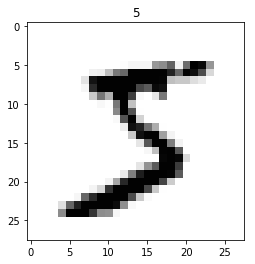

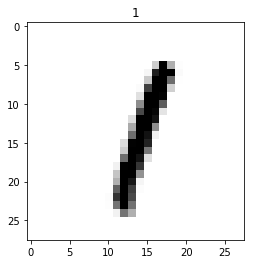

In [49]:
# handle rough data, test

train_100_dataset = np.ndarray(shape = (len(rough_data), img_size, img_size), dtype = np.float32)#init train dataset
num_record = 0 # number of record in train_100_dataset

train_100_labels = np.ndarray(shape = len(rough_data), dtype = np.int32)


for data in rough_data:
    train_100_dataset[num_record] = (np.asfarray(data[1:]).reshape(img_size,img_size))
    train_100_labels[num_record] = np.int32(data[0])
    num_record += 1
    

# print(train_100_dataset.shape)
# check your data handle   
plt.title(train_100_labels[0])
plt.imshow(train_100_dataset[0], cmap = 'Greys')
plt.show()


test_10_dataset = np.ndarray(shape = (len(rough_test), img_size, img_size), dtype = np.float32)#init train dataset
num_record = 0 # number of record in test_10_dataset

test_10_labels = np.ndarray(shape = len(rough_test), dtype = np.int32)


for data in rough_test:
    test_10_dataset[num_record] = (np.asfarray(data[1:]).reshape(img_size,img_size))
    test_10_labels[num_record] = np.int32(data[0])
    num_record += 1
    

# print(train_100_dataset.shape)
# check your data handle   
plt.title(test_10_labels[5])
plt.imshow(test_10_dataset[5], cmap = 'Greys')

In [50]:
# training

myNN = NeuralNetWork(img_size*img_size, num_hidden_nodes, 10, learning_rate)

data_in_vector = train_100_dataset.reshape(-1,img_size*img_size)

#print(data_in_vector.shape)

for i in range(len(train_100_dataset)): 
    inputs_list = data_in_vector[i]
    inputs_list = (np.asfarray(data_in_vector[i][0:]) / 255.0 * 0.99) + 0.01
    targets_list = np.zeros(10) + 0.01
    targets_list[np.int32(train_100_labels[i])] = 0.99
    myNN.train(inputs_list, targets_list)
    



[7 2 1 0 4 1 4 9 5 9]
[7 3 1 0 4 1 4 6 6 7]
[1, 7, 8, 9]


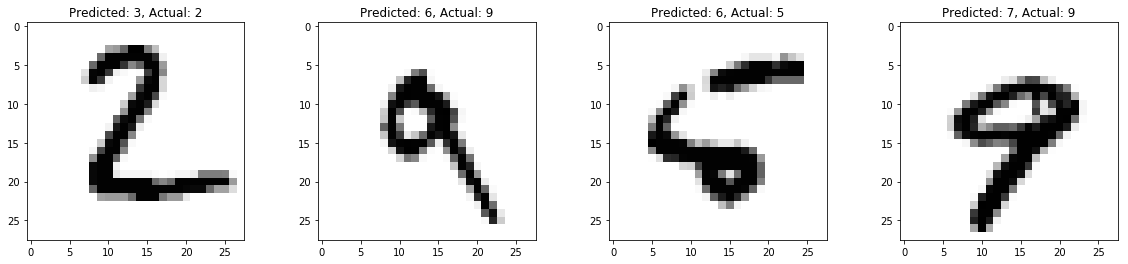

In [51]:
# testing
test_in_vector = test_10_dataset.reshape(-1,img_size*img_size)
predictions = []

for record in test_in_vector:
    query_list = myNN.query(record).tolist()
    predictions.append(query_list.index(max(query_list)))
    

print(test_10_labels)
print(np.array(predictions))


# show some misclassifed
misclassifiedIndexes = []

for index in range(len(predictions)):
    if test_10_labels[index] != predictions[index]:
        misclassifiedIndexes.append(index)
        
print(misclassifiedIndexes)

plt.figure(figsize = (20,4))

for plotIndex, index in enumerate(misclassifiedIndexes):
    plt.subplot(1,len(misclassifiedIndexes), plotIndex+1)
    plt.imshow(test_10_dataset[index], cmap = 'Greys')
    plt.title('Predicted: {}, Actual: {}'.format(predictions[index], test_10_labels[index]))